In [1]:
import fastbook
import winprocess

In [2]:
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = Path('images/bears')

In [4]:
fns = get_image_files(path)

In [7]:
fns
failed = []

In [9]:
for f in fns:
    passed = verify_image(f)
    
    if not passed:
        os.unlink(f)

In [10]:
bears = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [11]:
bears = bears.new(
item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

In [12]:
bears

In [13]:
dls = bears.dataloaders(path, num_workers=0)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [15]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.511096,0.527733,0.148148,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.479711,0.157905,0.092593,00:05
1,0.328672,0.016380,0.000000,00:05
2,0.242345,0.008794,0.000000,00:05
3,0.183035,0.003962,0.000000,00:05


In [16]:
interp = ClassificationInterpretation.from_learner(learn)

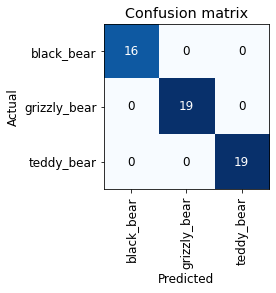

In [17]:
interp.plot_confusion_matrix()

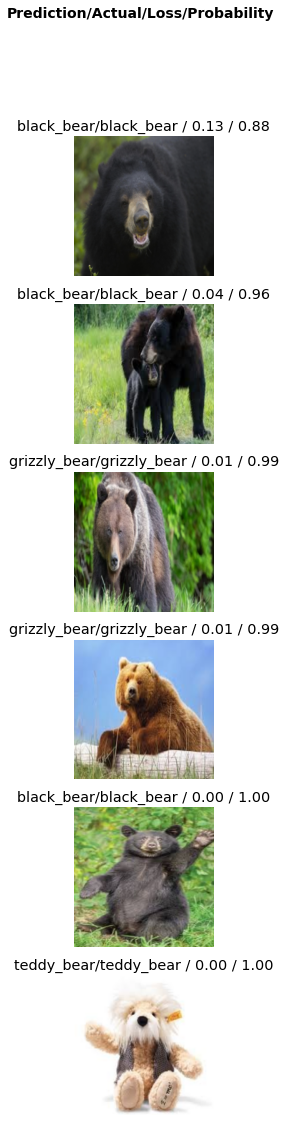

In [18]:
interp.plot_top_losses(6, nrows=6)

In [19]:
learn.export()